# Project 3: Classification with Logistic Regression and SVM


# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [2]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_data(file_path):
    with open(file_path, 'r') as f:
        m, n = map(int, f.readline().split('\t'))
        df = pd.read_csv(f, header=None, delimiter='\t', engine='python')
        features = df.iloc[:, :n].to_numpy()
        y_true = df.iloc[:, n].to_numpy()
        return m, n, features, y_true


train_m, train_n, train_features, train_y_true = read_data('P3train.txt')
test_m, test_n, test_features, test_y_true = read_data('P3test.txt')
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [3]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################
def generate_polynomial_features(X, max_degree=2):
    x1 = X[:, 0]
    x2 = X[:, 1]
    m = len(x1)
    new_features = [np.ones(m)]
    for i in range(1, max_degree + 1):
        for j in range(i + 1):
            new_features.append((x1 ** (i - j)) * (x2 ** j))
    return np.column_stack(new_features)

def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0) + 1e-10
    X_norm = (X - mean) / std
    return X_norm, mean, std

def logistic_regression(X, y, learning_rate, num_iterations):
    w = np.zeros((X.shape[1], 1))
    J = []
    w, J = Vanilla_GD(X, y, num_iterations, learning_rate, w, J)
    return w, J

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [4]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
def gradient_func(X_train, y_train, w):
    y_pred = sigmoid(np.dot(X_train, w))
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)
    return gradient

def Vanilla_GD(X_train, y_train, epoch_num, lr, w, J):
    for epoch in range(epoch_num):
        y_pred = sigmoid(np.dot(X_train, w))
        loss = cross_entropy_loss(y_train, y_pred)
        J.append(loss)
        gradient = gradient_func(X_train, y_train, w)
        w -= lr * gradient
    return w, J




# Define the hyperparameters:
# Numbers of epoch (epoch_num), Learning rate (lr), and the initial weights(w)
epoch_num = 45000
lr = .01

# Read and preprocess training data
train_m, train_n, train_features_original, train_y_true = read_data('P3train.txt')  # Save original features here
train_features = generate_polynomial_features(train_features_original)  # Generate polynomial features
train_features, mean_train, std_train = feature_scaling(train_features)  # Feature scaling
train_y_true = train_y_true.reshape(-1, 1)

# Read and preprocess testing data
test_m, test_n, test_features, test_y_true = read_data('P3test.txt')
test_features = generate_polynomial_features(test_features)
test_features = (test_features - mean_train) / std_train
test_y_true = test_y_true.reshape(-1, 1)

w, J = logistic_regression(train_features, train_y_true, lr, epoch_num)
test_y_pred = sigmoid(np.dot(test_features, w))

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

Weights:
[[ 0.        ]
 [ 1.2741606 ]
 [ 1.64719577]
 [-2.58653884]
 [-1.6079213 ]
 [-2.99993803]]


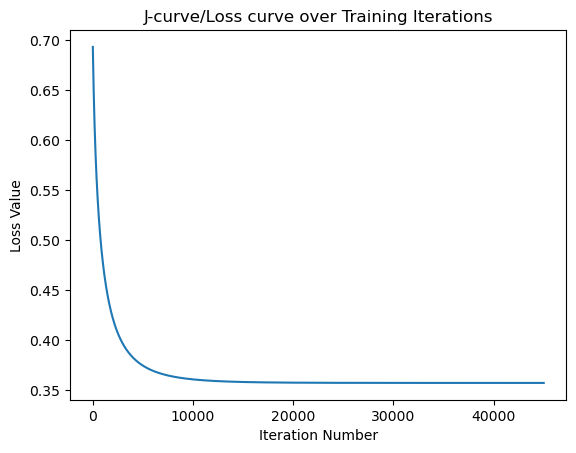

In [5]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
print("Weights:")
print(w)
plt.plot(J)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('J-curve/Loss curve over Training Iterations')
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  

## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


In [7]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################
def evaluate_model(y_true, y_pred):
    y_pred_class = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_pred_class == y_true)
    true_positives = np.sum((y_pred_class == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred_class == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    print(f"Accuracy: {accuracy:.0%}")
    print(f"Precision: {precision:.0%}")
    print(f"Recall: {recall:.0%}")
    print(f"F1 Score: {f1:.0%}")
    
evaluate_model(test_y_true, test_y_pred)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Accuracy: 85%
Precision: 79%
Recall: 94%
F1 Score: 86%


## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [8]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_svm(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {round(accuracy * 100)}%")
    print(f"Precision: {round(precision * 100)}%")
    print(f"Recall: {round(recall * 100)}%")
    print(f"F1 Score: {round(f1 * 100)}%\n")
    
# Train SVM models using different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_model = None
best_accuracy = 0

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    if (kernel == 'rbf'):
        clf = svm.SVC(kernel=kernel, gamma=.1)
    clf.fit(train_features, train_y_true.ravel())
    test_y_pred = clf.predict(test_features)
    
    # Evaluate model
    print(f"Kernel: {kernel}")
    evaluate_model_svm(test_y_true, test_y_pred)
    
    accuracy = accuracy_score(test_y_true, test_y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf

# Print weights of the best model
print("Best Model Information:")
print(f"Best Model: {best_model.kernel}")
if best_model.kernel == 'linear':
    print("Weights:", best_model.coef_)
elif best_model.kernel == 'rbf':
    if best_model.gamma == 'scale':
        # Calculate the gamma value
        n_features = train_features.shape[1]
        var_data = np.var(train_features)
        calculated_gamma = 1 / (n_features * var_data)
        print(f"Calculated Gamma (scale): {calculated_gamma}")
    else:
        print(f"Gamma: {best_model.gamma}")
    print("Note: RBF kernel doesn't have weights")
else:
    print("This kernel doesn't provide weights")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Kernel: linear
Accuracy: 79%
Precision: 71%
Recall: 94%
F1 Score: 81%

Kernel: rbf
Accuracy: 85%
Precision: 79%
Recall: 94%
F1 Score: 86%

Kernel: poly
Accuracy: 79%
Precision: 71%
Recall: 94%
F1 Score: 81%

Kernel: sigmoid
Accuracy: 76%
Precision: 72%
Recall: 81%
F1 Score: 76%

Best Model Information:
Best Model: rbf
Gamma: 0.1
Note: RBF kernel doesn't have weights


## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

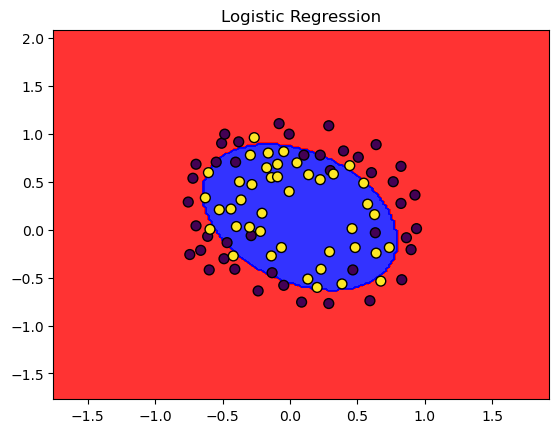

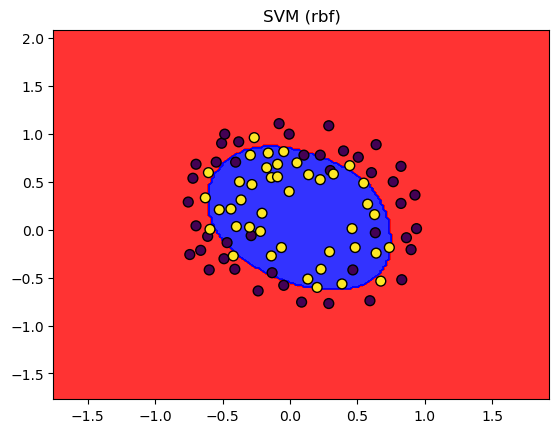

In [9]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################
# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = generate_polynomial_features(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z - mean_train) / std_train
    
    if title == 'Logistic Regression':
        Z = sigmoid(np.dot(Z, w))
        Z = (Z >= 0.5).astype(int)
    else:
        Z = classifier.predict(Z)
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.show()
    
# Plot decision boundary for Logistic Regression
plot_decision_boundary(train_features_original, train_y_true.ravel(), None, 'Logistic Regression')

# Plot decision boundary for the best SVM model
plot_decision_boundary(train_features_original, train_y_true.ravel(), best_model, f'SVM ({best_model.kernel})')
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################